# Implement a Neural Network Using Keras

In [1]:
import pandas as pd
import numpy as np
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow.keras as keras
import time

## Part 1. Build DataFrame and Define ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the data set ``airbnbData_train``. 

In [2]:
filename = os.path.join(os.getcwd(), "..", "data", "airbnbData_train.csv")
df = pd.read_csv(filename)

#### Define the Label

Our goal is to train a machine learning model that predicts whether an Airbnb host is a 'super host'. This is an example of supervised learning and is a binary classification problem. In our dataset, our label will be the `host_is_superhost` column and the label will either contain the value `True` or `False`.

#### Identify Features

Our features will be all of the remaining columns in the dataset.

## Part 2. Prepare Your Data

Many data preparation techniques have already been performed and the data is almost ready for modeling; the data set has one-hot encoded categorical variables, scaled numerical values, and imputed missing values. However, the data set has a few features that have boolean values. When working with Keras, features should have floating point values.

Let's convert these features from booleans to floats.


In [3]:
boolean = df.select_dtypes(include='bool').columns
df[boolean] = df[boolean].astype('float')

Let's inspect the columns after the conversion. 

In [4]:
df.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,...,n_host_verifications,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,1.0,1.0,1.0,0.0,-0.578829,-2.845589,-0.054298,-0.054298,-1.007673,...,1.888373,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,-4.685756,-0.430024,-0.112284,-0.112284,0.067470,...,0.409419,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.578052,-2.473964,-0.112284,-0.112284,0.605041,...,-1.069535,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.578052,1.010024,-0.112284,-0.112284,-0.470102,...,-0.576550,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,1.0,0.0,-0.054002,-0.066308,-0.112284,-0.112284,-1.007673,...,0.902404,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Part 3. Create Labeled Examples from the Data Set 

In [5]:
y = df['host_is_superhost']
X = df.drop(columns='host_is_superhost')

## Part 4. Create Training and Test Data Sets


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [7]:
X_train.shape

(21016, 49)

## Part 5. Construct the Neural Network


### Step 1.  Define Model Structure

Next we will create our neural network structure. We will create an input layer, three hidden layers and an output layer:

* <b>Input layer</b>: The input layer will have the input shape corresponding to the number of features. 
* <b>Hidden layers</b>: We will create three hidden layers of widths (number of nodes) 64, 32, and 16. They will utilize the ReLU activation function. 
* <b>Output layer</b>: The output layer will have a width of 1. The output layer will utilize the sigmoid activation function. Since we are working with binary classification, we will be using the sigmoid activation function to map the output to a probability between 0.0 and 1.0. We can later set a threshold and assume that the prediction is class 1 if the probability is larger than or equal to our threshold, or class 0 if it is lower than our threshold.

To construct the neural network model using Keras, we will do the following:
* We will use the Keras `Sequential` class to group a stack of layers. This will be our neural network model object. For more information, consult the Keras online [documentation](https://keras.io/api/models/sequential/#sequential-class).
* We will use the `InputLayer` class to create the input layer. For more information, consult  the Keras online [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer).
* We will use the `Dense` class to create each hidden layer and the output layer. For more information, consult the Keras online [documentation](https://keras.io/api/layers/core_layers/dense/).
* We will add each layer to the neural network model object.

In [8]:
# 1. Create model object:
nn_model = keras.Sequential()

# 2. Create the input layer and add it to the model object: 
# Create input layer:
input_shape = (X_train.shape[1],)
input_layer = keras.layers.InputLayer(shape=input_shape)

# Add input_layer to the model object:
nn_model.add(input_layer)

# 3. Create the first hidden layer and add it to the model object:
# Create hidden layer:
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
# Add hidden_layer_1 to the model object:
nn_model.add(hidden_layer_1)

# 4. Create the second hidden layer and add it to the model object:
# Create hidden layer:
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
# Add hidden_layer_2 to the model object:
nn_model.add(hidden_layer_2)

# 5. Create the third hidden layer and add it to the model object:
# Create hidden layer:
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
# Add hidden_layer_3 to the model object:
nn_model.add(hidden_layer_3)

# 6. Create the output layer and add it to the model object:
# Create output layer:
output_layer = keras.layers.Dense(units=1, activation='sigmoid')
# Add output_layer to the model object:
nn_model.add(output_layer)

# Print summary of neural network model structure
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,825 (22.75 KB)

 Trainable params: 5,825 (22.75 KB)

 Non-trainable params: 0 (0.00 B)

### Step 2. Define the Optimization Function

In [9]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

### Step 3. Define the Loss Function

In [10]:
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

### Step 4. Compile the Model
   

In [11]:
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

## Part 6. Fit the Model to the Training Data

We will define our own callback class to output information from our model while it is training. Make sure you execute the code cell below so that it can be used in subsequent cells.

In [12]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


In [13]:
t0 = time.time() # start time

num_epochs = 100 # epochs


history = nn_model.fit(X_train, y_train, epochs=num_epochs, verbose=0, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)], validation_split=0.2)


t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 100], Accuracy: 0.8379, Loss: 0.3580, Val_accuracy: 0.8256, Val_loss: 0.3781
Epoch [10/ 100], Accuracy: 0.8496, Loss: 0.3311, Val_accuracy: 0.8268, Val_loss: 0.3716
Epoch [15/ 100], Accuracy: 0.8579, Loss: 0.3152, Val_accuracy: 0.8278, Val_loss: 0.3682
Epoch [20/ 100], Accuracy: 0.8663, Loss: 0.3018, Val_accuracy: 0.8233, Val_loss: 0.3797
Epoch [25/ 100], Accuracy: 0.8728, Loss: 0.2861, Val_accuracy: 0.8363, Val_loss: 0.3910
Epoch [30/ 100], Accuracy: 0.8759, Loss: 0.2761, Val_accuracy: 0.8321, Val_loss: 0.3841
Epoch [35/ 100], Accuracy: 0.8834, Loss: 0.2614, Val_accuracy: 0.8306, Val_loss: 0.3937
Epoch [40/ 100], Accuracy: 0.8896, Loss: 0.2500, Val_accuracy: 0.8325, Val_loss: 0.4226
Epoch [45/ 100], Accuracy: 0.8961, Loss: 0.2389, Val_accuracy: 0.8168, Val_loss: 0.4468
Epoch [50/ 100], Accuracy: 0.8986, Loss: 0.2311, Val_accuracy: 0.8283, Val_loss: 0.4417
Epoch [55/ 100], Accuracy: 0.9029, Loss: 0.2225, Val_accuracy: 0.8240, Val_loss: 0.4791
Epoch [60/ 100], Accuracy: 0.9033

In [14]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Visualize the Model's Performance Over Time

The code below outputs both the training loss and accuracy and the validation loss and accuracy. Let us visualize the model's performance over time:

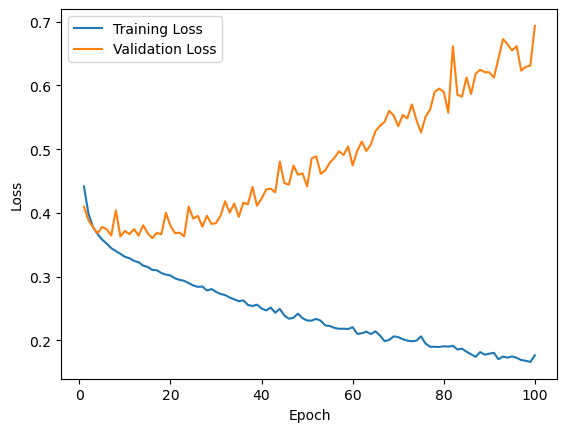

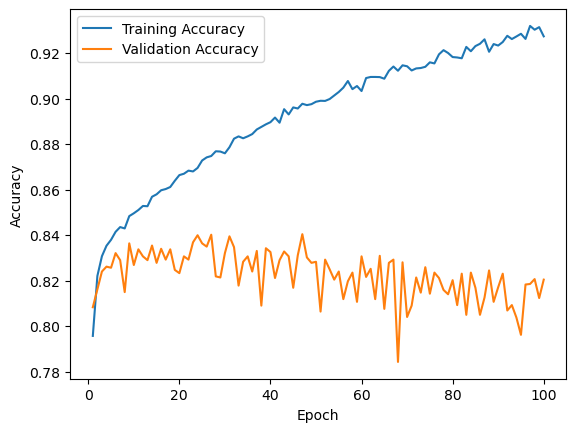

In [15]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Part 7. Evaluate the Model's Performance

We just evaluated our model's performance on the training and validation data. Let's now evaluate its performance on our test data and compare the results.

Keras makes the process of evaluating our model very easy. Recall that when we compiled the model, we specified the metric that we wanted to use to evaluate the model: accuracy. The Keras method `evaluate()` will return the loss and accuracy score of our model on our test data.

In [16]:
loss, accuracy = nn_model.evaluate(X_test, y_test)

print('Loss: {0} Accuracy: {1}'.format(loss, accuracy))

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8219 - loss: 0.7036
Loss: 0.7017796039581299 Accuracy: 0.819440484046936


Next, for every example in the test set, we will make a prediction using the `predict()` method, receive a probability between 0.0 and 1.0, and then apply a threshold (we will use a threshold of 0.6) to obtain the predicted class. We will save the class label predictions to list `class_label_predictions`.

In [17]:
# Make predictions on the test set
probability_predictions = nn_model.predict(X_test)
class_label_predictions=[]

for i in range(0,len(y_test)):
    if probability_predictions[i] >= 0.6:
        class_label_predictions.append(1)
    else:
        class_label_predictions.append(0)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


In [18]:
c_m = confusion_matrix(y_test, class_label_predictions)
c_m

array([[4838,  433],
       [ 828,  907]])